# Data Analysis
In this notebook we are going to do the following:
* Pre-Processing
* Step#1:Word2Vec 
* Step#2: t-sne
* Step#3: Preparing data frames for visualization


In [46]:
# imports
import pandas as pd
import numpy as np

import re 
import string
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from gensim.models import Word2Vec
import arabic_reshaper
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

[nltk_data] Downloading package stopwords to /Users/nada/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/nada/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# Load data
df_clean = pd.read_csv('df_half_clean.csv')

## Pre-Processing

In [3]:
# Normlization
def preprocessing(text):
    '''
    :type text: str
    :rtype: str
    '''
    text = re.sub(r'ى','ي', text)
    text = re.sub(r'ؤ','ء', text)
    text = re.sub(r'ئ','ء', text)
    text = re.sub(r'ة','ه', text)
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub(r'گ','ك', text)
    # remove english letters
    text = re.sub(r'[A-Z a-z]',' ', text)

    # Remove longation # https://github.com/saobou/arabic-text-preprocessing/blob/master/Preprocess.ipynb
    text = re.sub(r'(.)\1+', r"\1\1", text) 

    # remove numbers
    text = re.sub(r'[0-9]', ' ', text) 
    
    # remove things..
    text = re.sub(r'► ∞  ı ▼ ل  ♥ ‡' , ' ', text) 
    
    text = re.sub(r'™ â  § ® © £ ± ç é í ó ú ü ñ ¿ ¡ Ŝ ħ ặ ť ħ ặ Ł ◌̇ ◌́ ◌̀ ◌̌ ◌̂ ◌̋ ◌̏ ◌̃ Я ǖ ợ đ Ḿ ĕ ṥ ђ ë' , ' ', text) 
    
    # words = text.split()
    # text = " ".join(sorted(set(words), key = words.index))

    return text

In [4]:
# remove punctuations 

arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
english_punctuations = string.punctuation
punctuations_list = arabic_punctuations + english_punctuations

def remove_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

In [5]:
# Remove diacritics
#https://github.com/motazsaad/process-arabic-text/blob/master/clean_arabic_text.py

arabic_diacritics = re.compile("""
                             ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)

def remove_diacritics(text):
    text = re.sub(arabic_diacritics, '', text)

    # tokens = nltk.sent_tokenize(text) # this messes evething up 

    return text

In [6]:
def nonStopWord(text):
    '''
    remove stop words and keep the rest
    https://stackoverflow.com/questions/42625084/does-nltk-contain-arabic-stop-word-if-not-how-can-i-add-it
    https://stackoverflow.com/questions/49193966/python-nltk-cannot-tokenize-arabic-text
    check out: 
    https://github.com/mohataher/arabic-stop-words
    and
    https://github.com/linuxscout/arabicstopwords

    '''
    # text = text.decode('utf-8')
    sw = stopwords.words('arabic')
    tokens = nltk.word_tokenize(text)
    stopped_tokens = [i for i in tokens if not i in sw]

    # for item in stopped_tokens:
    #     print(item) # will print every word (i.e. token)

    return stopped_tokens # not sure about the return 

In [7]:
def clean_text(text):
    ## Remove punctuations
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,،-./:;<=>؟?@[\]^_`{|}~"""), ' ', text)  # remove punctuation
    ## remove extra whitespace
    text = re.sub('\s+', ' ', text)  
    ## Remove Emojis
    # text = remove_emoji(text)
    ## Convert text to lowercases
    # text = text.lower()
    ## Remove numbers
    text = re.sub("\d+", " ", text)
    ## Remove Tashkeel
    # text = normalizeArabic(text)
    
    #text = re.sub('\W+', ' ', text)
    text = re.sub('[A-Za-z]+',' ',text)
    text = re.sub(r'\\u[A-Za-z0-9\\]+',' ',text)
    ## remove extra whitespace
    text = re.sub('\s+', ' ', text)  
    #Stemming
    #text = stem(text)
    return text

In [8]:
# function calls for: 1. preprocessing(text) 2. remove_diacritics(text) 3. nonStopWord(text)
# don't forget to run the function cells before this 
L  = [] # L: Is sa list of list that containes all the novels

for text in df_clean['text'].values:
    text = preprocessing(text) 
    text = clean_text(text)
    text = remove_punctuations(text) 
    text = remove_diacritics(text) 
    #text = nonStopWord(text)

    L.append(text)
    # comment the below lines to run for all data
    #print(text)
    #break

In [9]:
# Creat a dataframe with cleand text
df_text = pd.DataFrame(L, columns=['text']) # dataframe for L

In [10]:
df_text.head(3)

,text
0,الي عشاق القصهالطوي الجزء الاول اصرخ في كل يوم...
1,في المملكه العربيه السعوديه وفي منطقه جيزان جن...
2,في اطواف المدرسه كانت جالسه تحت طوف تناظرها م...


In [11]:
# save the cleaned text 
df_clean.text= df_text.text 

In [12]:
df_clean.head(10)

,Unnamed: 0,name,author,#of_Words,text
0,0,الآسيره,صمت الجروح أم مجتبـى,24964,الي عشاق القصهالطوي الجزء الاول اصرخ في كل يوم...
1,1,إليك يامن زرعت في قلبي أزهار الربيع,أمك تجيبك وأنا أبتلي,20835,في المملكه العربيه السعوديه وفي منطقه جيزان جن...
2,2,مدرسة المشاغبين السبع !,وردة حمراء,178800,في اطواف المدرسه كانت جالسه تحت طوف تناظرها م...
3,3,اعترافات رجل يكره يحب يعشق يبغض النساء,سهر الليالي,39744,الفصل الاول صباح يوم الاحد توجهت لمكتبي مثل ع...
4,4,بقراري ضيعت نفسي و أحبابي,الجوري,52384,البندري سنه يتيمه الاب اختها الكبيره مشاعل سن...
5,5,ذنبي إني لقيط,الـ ج ـوري,32235,الف مبرووك يا ناصر تستاهل والله ناصر الله يب...
6,6,غفلتي دفعتني حياتي,الجوري,49554,دخلت مونيكا بيت اهل زوجها ما حطت اي مكياج بوج...
7,7,برد وجفا ونسمة هوى,وصيت قلبي عليك,119425,الجزء الاول يتذكر ذيك الليله السوده وكانها صا...
8,8,رحلتي إلى النور,مازن الغامدي,80713,الحلقه الاولي في عام للهجره كنت ادرس في الصف ...
9,9,صاحب الظل الطويل,إيمليا أمل,102875,جلست علي المنضده لاكتب لكم قصه جميله فلم اجد ق...


In [13]:
df_clean.drop(['Unnamed: 0'], axis = 1)

,name,author,#of_Words,text
0,الآسيره,صمت الجروح أم مجتبـى,24964,الي عشاق القصهالطوي الجزء الاول اصرخ في كل يوم...
1,إليك يامن زرعت في قلبي أزهار الربيع,أمك تجيبك وأنا أبتلي,20835,في المملكه العربيه السعوديه وفي منطقه جيزان جن...
2,مدرسة المشاغبين السبع !,وردة حمراء,178800,في اطواف المدرسه كانت جالسه تحت طوف تناظرها م...
3,اعترافات رجل يكره يحب يعشق يبغض النساء,سهر الليالي,39744,الفصل الاول صباح يوم الاحد توجهت لمكتبي مثل ع...
4,بقراري ضيعت نفسي و أحبابي,الجوري,52384,البندري سنه يتيمه الاب اختها الكبيره مشاعل سن...
...,...,...,...,...
877,يعرف نقطة ضعفي حبي له,حب بابي,32849,ضربت الابله الطاوله وبعصبيه ديم ديم رفعت راسها...
878,يعشقني من قلبه هو قال,جنون ورده,59364,البارت الاول الشخصيات الرءيسيه بيت ابو علي رز...
879,يمسح الدمعة بشكوى,هدوئي,161032,الجزء الاول امي جدي انت تكلم جد ابو فهد وهذي ...
880,يوم شفتك طاح قلبي بطوله,مجهولة !!,81053,ابوو محمد ابو محمد رجال اعمال يشتغل في شركه كب...


In [14]:
# df_clean.to_csv('cleaned_dataset_Nada.csv', index=False)

In [15]:
# Load data
df_clean = pd.read_csv('cleaned_dataset_Nada.csv')

In [16]:
df_clean.shape

(882, 5)

In [17]:
df_clean.head()

,Unnamed: 0,name,author,#of_Words,text
0,0,الآسيره,صمت الجروح أم مجتبـى,24964,الي عشاق القصهالطوي الجزء الاول اصرخ في كل يوم...
1,1,إليك يامن زرعت في قلبي أزهار الربيع,أمك تجيبك وأنا أبتلي,20835,في المملكه العربيه السعوديه وفي منطقه جيزان جن...
2,2,مدرسة المشاغبين السبع !,وردة حمراء,178800,في اطواف المدرسه كانت جالسه تحت طوف تناظرها م...
3,3,اعترافات رجل يكره يحب يعشق يبغض النساء,سهر الليالي,39744,الفصل الاول صباح يوم الاحد توجهت لمكتبي مثل ع...
4,4,بقراري ضيعت نفسي و أحبابي,الجوري,52384,البندري سنه يتيمه الاب اختها الكبيره مشاعل سن...


## Step#1:Word2Vec 


There are two architectures for implementing Word2Vec:

1.   CBOW (Continuous Bag-Of-Words)
2.   Skip-gram

I'm using skip-gram



In [18]:
# pip install gensim

In [19]:
# print(L[0])

In [20]:
#all_words = [nltk.word_tokenize(sent) for sent in nltk.sent_tokenize(L)]
#print(all_words)

In [21]:
all_words = [] # all_word: Is a list of list for words for each novel 
for i in range (len(L)):
    all_words.append([nltk.word_tokenize(sent) for sent in nltk.sent_tokenize(L[i])])
#print(all_words)

In [22]:
for i in range(len(all_words)): all_words[i] = [w for w in all_words[i] if w not in stopwords.words('arabic')]
#print(all_words[1])

In [23]:
# 'all_words' is a list of list, the next line convert it into one list # ref: https://stackoverflow.com/questions/952914/how-to-make-a-flat-list-out-of-list-of-lists
#a_all_words = [item for sublist in all_words for item in sublist]

In [24]:
a_all_words = [] # one list with all the words from all the novels
for sublist in all_words:
    for item in sublist:
        #for item in item:
        a_all_words.append(item)

In [25]:
#print(a_all_words[675])

In [26]:
# https://medium.com/@zafaralibagh6/a-simple-word2vec-tutorial-61e64e38a6a1
#word2vec2 = Word2Vec(a_all_words, min_count=8)
w2v_model = Word2Vec(a_all_words,min_count=20)

In [27]:
vocabulary = w2v_model.wv.vocab
print(len(vocabulary)) # 447644 

109689


In [28]:
v1 = w2v_model.wv['كره']
print(v1)

[-8.93189386e-02  1.48538336e-01  2.90435553e-01  3.09693813e-01
 -5.01944184e-01  2.76809424e-01  2.54043132e-01  3.00815731e-01
  6.58906877e-01  1.32663697e-01  6.24494493e-01  4.09695536e-01
  5.57793617e-01  3.84174623e-02 -1.09553826e+00  2.39221081e-01
 -8.54749799e-01 -1.20410636e-01  7.74005987e-03 -2.05111161e-01
  3.47153932e-01 -1.06946313e+00 -3.36847782e-01 -2.71270245e-01
  4.94433343e-01  1.10486019e+00 -1.12225807e+00  1.18131149e+00
  8.36688638e-01 -2.23150611e-01  2.59312615e-02 -2.93928653e-01
 -2.20075324e-01  1.18042774e-01 -1.16464116e-01 -3.77202898e-01
  3.58389467e-02  1.67172924e-01 -7.64060318e-01  6.09223805e-02
  3.96894105e-02 -1.49589812e-03 -1.28229988e+00  5.92597723e-01
 -4.33789372e-01 -7.04845250e-01 -8.49893391e-01 -1.40963262e-02
  8.36149096e-01  9.32939708e-01 -2.64815032e-01  4.52410221e-01
  2.42584080e-01 -3.48815173e-01 -1.32217139e-01  1.76590967e+00
 -6.99486136e-01  3.55074465e-01  8.85041654e-01 -4.05450314e-01
 -5.34531891e-01  7.58487

In [29]:
sim_words = w2v_model.wv.most_similar('حب')
print(sim_words )

[('اعجاب', 0.7304155230522156), ('الحب', 0.6404587030410767), ('مخلوق', 0.6272358894348145), ('كره', 0.5797429084777832), ('حبها', 0.5762733221054077), ('يحب', 0.5739976763725281), ('قصه', 0.5701285004615784), ('انسان', 0.5636545419692993), ('حبه', 0.5551208257675171), ('غيره', 0.5478436946868896)]


In [30]:
sim_words = w2v_model.wv.most_similar('الرياض') # ohh yeah!
print(sim_words )

[('السعوديه', 0.9288634061813354), ('الشرقيه', 0.9196683168411255), ('الدمام', 0.8903120160102844), ('بريطانيا', 0.8551318645477295), ('فرنسا', 0.8504443168640137), ('لندن', 0.8449703454971313), ('الكويت', 0.8055250644683838), ('امريكا', 0.8045482039451599), ('مكه', 0.7947458028793335), ('باريس', 0.7843767404556274)]


In [31]:
sim_words = w2v_model.wv.most_similar('فراق')
print(sim_words )

[('القاسي', 0.7821528315544128), ('والالم', 0.781983494758606), ('قيد', 0.7724936008453369), ('الحرمان', 0.7704842686653137), ('فقدان', 0.7657265663146973), ('بقلب', 0.7638435363769531), ('حرقه', 0.7635387182235718), ('الضعيف', 0.760434627532959), ('الحنان', 0.7595913410186768), ('اقسي', 0.7531105875968933)]


In [32]:
sim_words = w2v_model.wv.most_similar('سوق')
print(sim_words )

[('مطعم', 0.8230710029602051), ('مجمع', 0.8150681257247925), ('الظهران', 0.8103842735290527), ('لسوق', 0.7926609516143799), ('مول', 0.7916805744171143), ('الملاهي', 0.7581461071968079), ('الفيصليه', 0.7574071288108826), ('السووق', 0.7457841634750366), ('ماركت', 0.7362827062606812), ('التحليه', 0.7352972030639648)]


In [33]:
sim_words = w2v_model.wv.most_similar('الليل')
print(sim_words )

[('اليل', 0.7626385688781738), ('النهار', 0.7557032704353333), ('الظهر', 0.7096762657165527), ('بالليل', 0.6832720041275024), ('الصباح', 0.6532268524169922), ('بليل', 0.633109450340271), ('الصبااح', 0.6320862770080566), ('الضهر', 0.6314182281494141), ('الوقت', 0.6309301853179932), ('الفجر', 0.6193765997886658)]


In [34]:
# w2v_model.save("w2v_model")

In [35]:
# Get the interactive Tools for Matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [36]:
w2v_model.most_similar(negative='حب')

/Users/nada/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('لشاليهم', 0.36693471670150757),
 ('الجنايني', 0.33819836378097534),
 ('الداوم', 0.3201355040073395),
 ('خاالده', 0.315401166677475),
 ('حريم', 0.31032872200012207),
 ('خذتلها', 0.3052636981010437),
 ('ارجعلها', 0.3026663661003113),
 ('مزااجه', 0.2961771488189697),
 ('يقبضون', 0.2860378324985504),
 ('واتكلمت', 0.2853151261806488)]

In [37]:
#result = w2v_model.most_similar(positive=['امراءه', 'وسيم'], negative=['رجل'])
#print("{}: {:.4f}".format(*result[0]))

In [38]:
# pip install arabic_reshaper

## Step#2: t-sne

In [39]:
# https://towardsdatascience.com/google-news-and-leo-tolstoy-visualizing-word2vec-word-embeddings-with-t-sne-11558d8bd4d
keys = ['خيل','اصفر','مدرسه','اختبارات','مشاكل','الجامعه',
         'منتجع','مسجد','سياره','نهار','شوق','بيتزا','عصير','توت',
         'العاب','مهرجان','حب','ترتعش',
         'بكاء','غثيان','داخت','الرياض',
         'سلامات','هلا','حمد','معزوفه',
         'فطور','دم','ورد','فستان','سيجاره',
         'مصعد','عرس']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in w2v_model.most_similar(word, topn=30):
        words.append(similar_word)
        embeddings.append(w2v_model[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

/Users/nada/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  from ipykernel import kernelapp as app
/Users/nada/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


In [40]:
embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)


In [44]:
def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(40, 30))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=arabic_reshaper.reshape(label)[::-1])
        for i, word in enumerate(words):
            plt.annotate(arabic_reshaper.reshape(word)[::-1], alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(arabic_reshaper.reshape(title)[::-1])
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

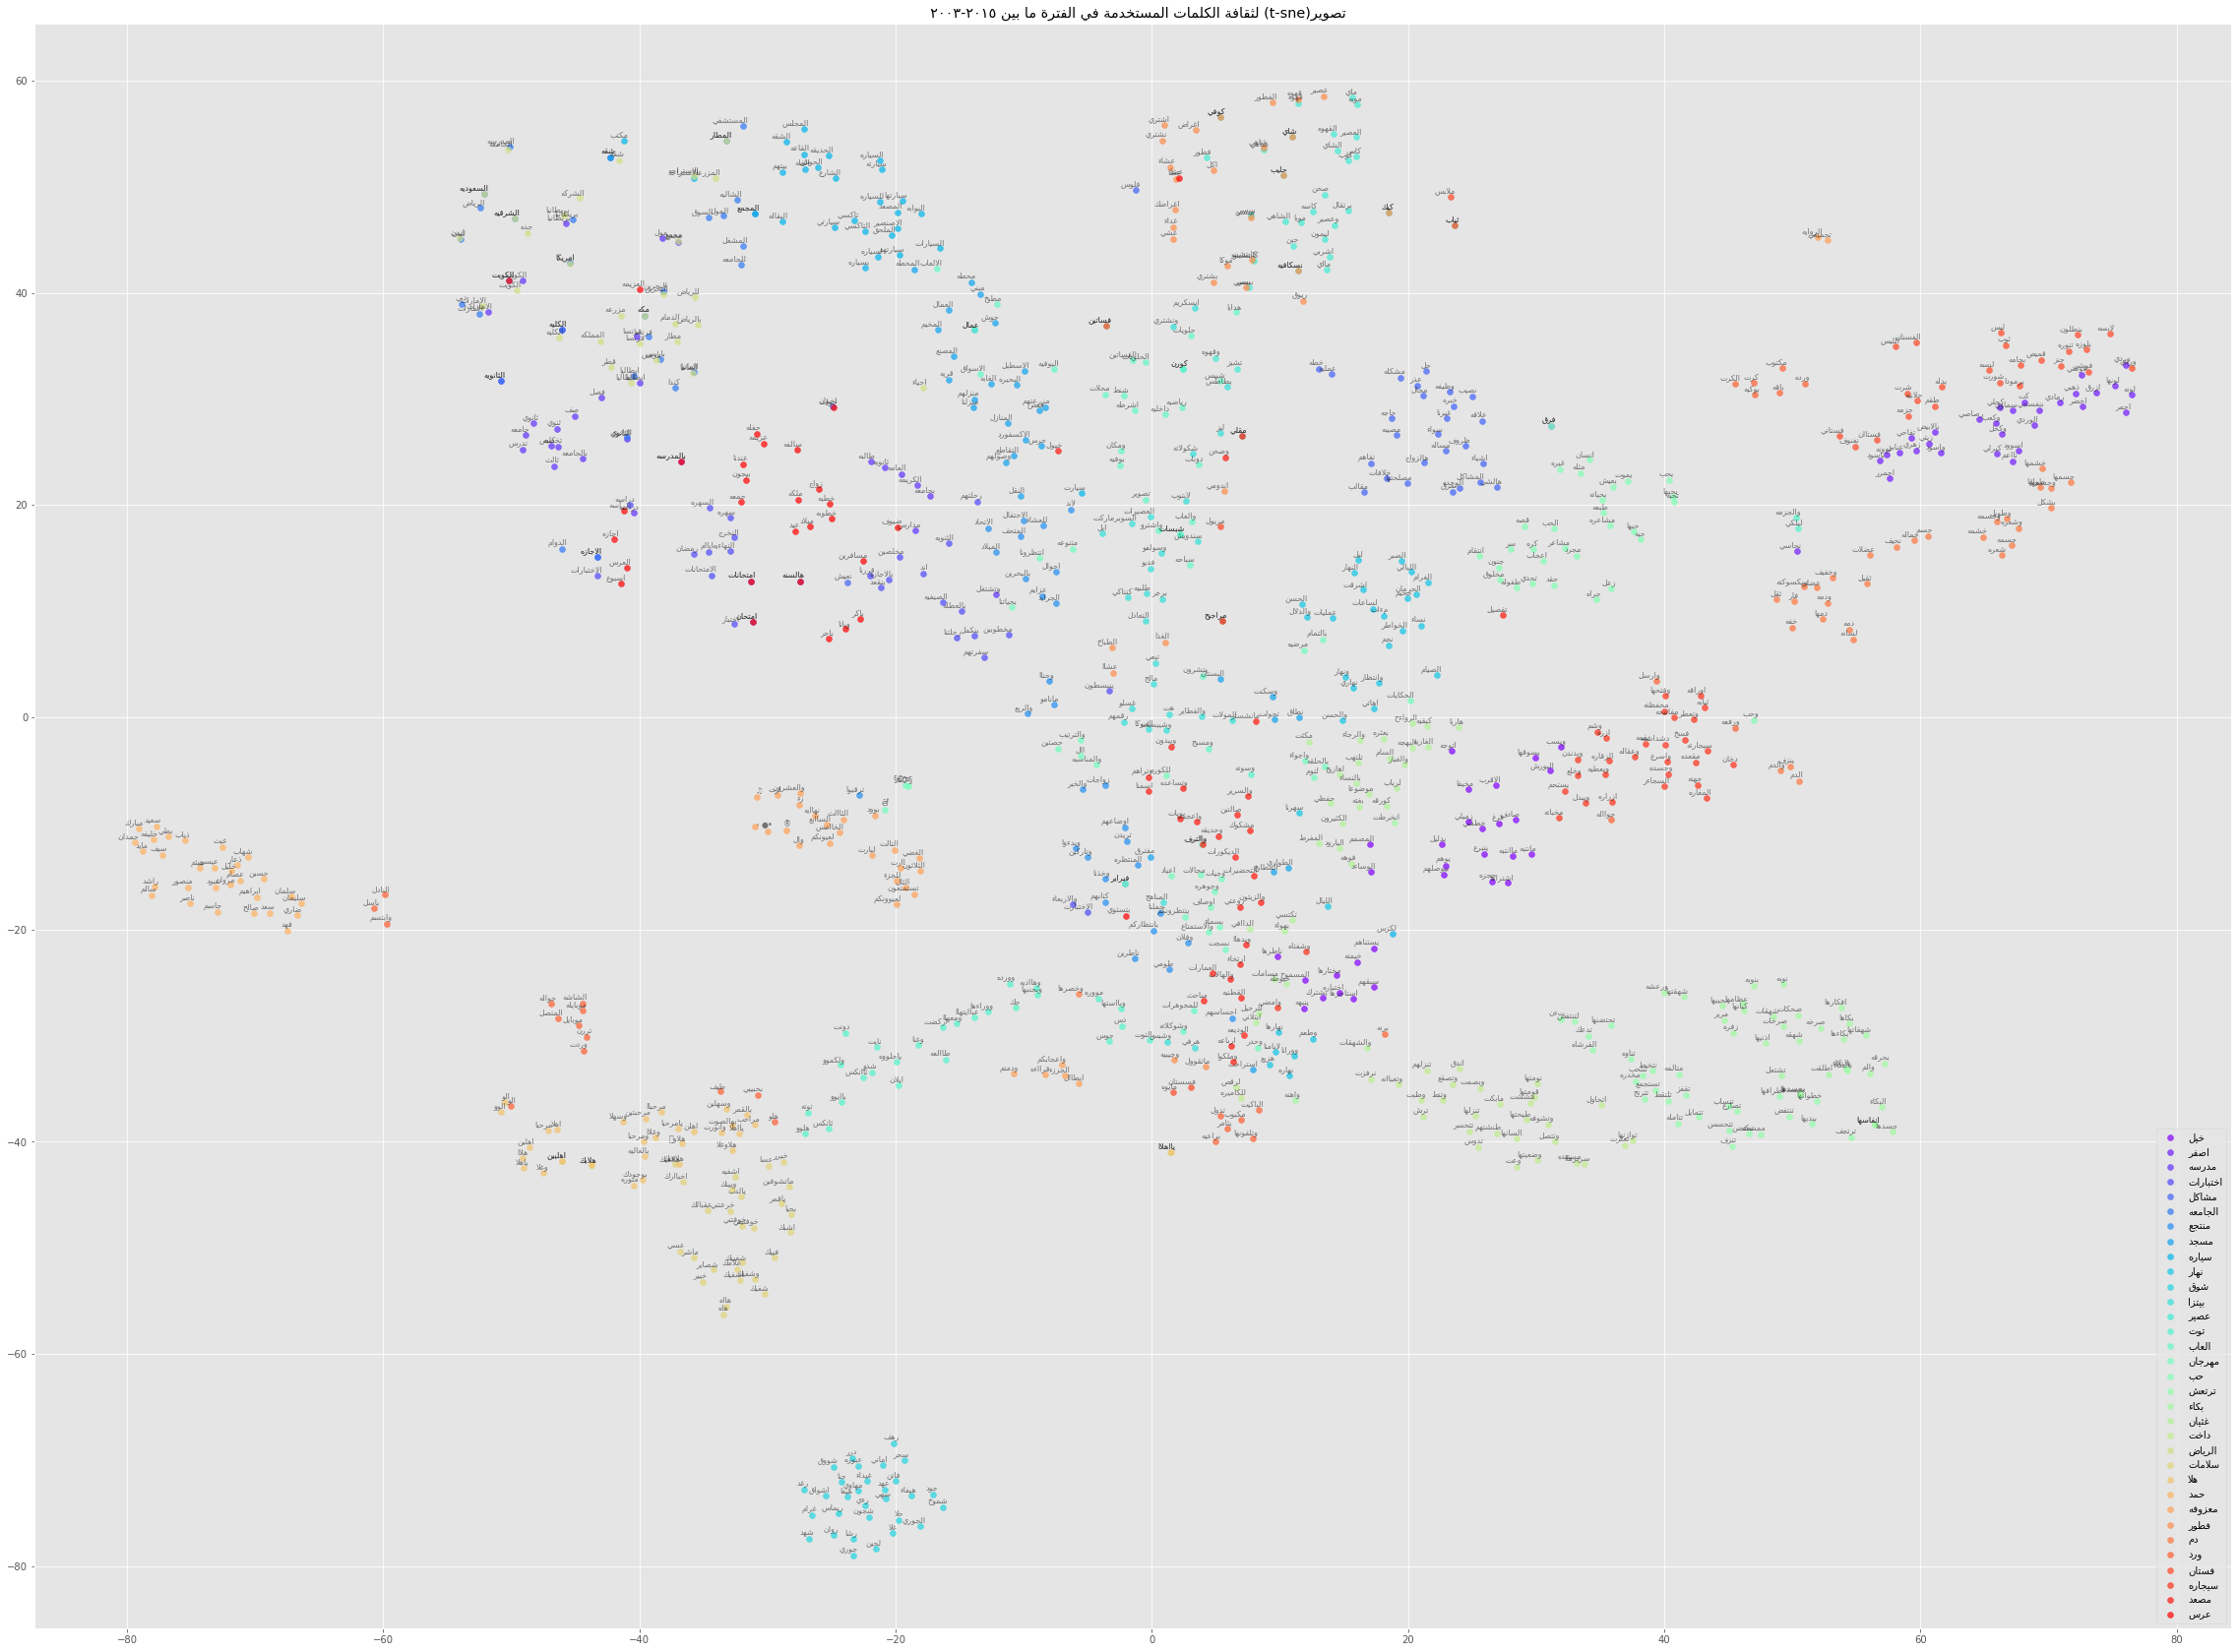

In [47]:
#كلمات متشابهة من مجموعة مختاره من الكلمات
tsne_plot_similar_words('تصوير)ens-t( لثقافة الكلمات المستخدمة في الفترة ما بين ٥١٠٢-٣٠٠٢  ', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words.png')

In [ ]:
len(new_a_all_words)

## Step#3: Preparing data frames for visualization

## part#1

In [48]:
new_a_all_words = []
for words in a_all_words:
    for word in words:
        new_a_all_words.append(word)

In [49]:
Countries_and_cities = ["الرياض", "السعوديه", "لندن", "الشرقية", "الدمام", "الخبر"
    , "فلسطين", "باريس" , "ايطاليا", "فرنسا", "امريكا", "جده", "كندا"
    , "الكويت" , "قطر", "الامارات", "عمان", "بريطانيا", "البحرين", "مكه",
    "المدينه", "ابها", "القصيم", "المانيا", "دبي", "نيويورك",
    "الطايف", "أبو ظبي", "اسبانيا", "المملكه", "ماليزيا"]
    
Places = ["المزرعه","الجامعه","الاستراحه","الجامعه","المدرسه","القاعه"
    ,"البيت","البر","المطار","شقه","السفاره","الدوام","العزا"
    ,"العيد","الحفله","استراحه","بيت","بيتنا", "الحج",  "الفصل"]

In [50]:
df = pd.DataFrame(columns=['locations','freq']) #countries_and_cities
df2 = pd.DataFrame(columns=['locations','freq']) #Places

In [51]:
df['locations'] = Countries_and_cities

In [52]:
df2['locations'] = pd.Series(Places)

In [53]:
from collections import Counter
counts = Counter(new_a_all_words)
#print(counts)
#print(counts['فلسطين'])

In [54]:
counts[Places[0]]

4473

In [55]:
freq=[]

for location in df.locations:
    freq.append(counts[location])
df['freq'] = pd.Series(freq)

In [56]:
freq=[]

for location in df2.locations:
    freq.append(counts[location])
df2['freq'] = pd.Series(freq)

In [57]:
df2

,locations,freq
0,المزرعه,4473
1,الجامعه,8787
2,الاستراحه,1924
3,الجامعه,8787
4,المدرسه,7761
5,القاعه,3075
6,البيت,66334
7,البر,1629
8,المطار,3694
9,شقه,3454


In [58]:
#df.to_csv('countries_and_cities.csv', index=False)
#df2.to_csv('Places.csv', index=False)

## Part#2

In [59]:
list1=['انتحار','قتل','خوف','كره','ظلم']
list2=['عشق','حنان','لطف','سعاده','حب']

In [60]:
df_love = pd.DataFrame(columns=['feelings','freq']) #countries_and_cities
df_hate = pd.DataFrame(columns=['feelings','freq']) #Places

In [61]:
df_love['feelings'] = pd.Series(list2)
df_hate['feelings'] = pd.Series(list1)

In [62]:
freq=[]

for feeling in df_love.feelings:
    freq.append(counts[feeling])
df_love['freq'] = pd.Series(freq)

In [63]:
freq=[]

for feeling in df_hate.feelings:
    freq.append(counts[feeling])
df_hate['freq'] = pd.Series(freq)

In [64]:
df_love

,feelings,freq
0,عشق,945
1,حنان,18202
2,لطف,210
3,سعاده,1312
4,حب,15828


In [65]:
df_hate

,feelings,freq
0,انتحار,127
1,قتل,1106
2,خوف,5386
3,كره,1821
4,ظلم,1016


In [66]:
#df_love.to_csv('love.csv', index=False)
#df_hate.to_csv('hate.csv', index=False)